# Car Price Prediction
This is a very simple, beginner level application of linear regression model using Scikit-learn. Here we will use the UCI automobile data to predict car prices. link: https://archive.ics.uci.edu/ml/datasets/automobile

We begin by importing the required modules

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
np.random.seed(1)
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score, KFold
import statistics as st

In [2]:
# we now read the csv file into pandas and we will name the features. The names are available from the website

names = ['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style',
        'drive-wheels', 'engine-location', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
        'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
         'compression-rate', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']

data=pd.read_csv("/Users/krishnan/downloads/imports-85.data",header=None,names=names)

print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

We can see that the dataframe comprises of both numerical and non-numerical data types. We will explore both of them during feature engineering. Now let us proceed to clean the data.

In [3]:
# we will drop symboling and normalized-losses as it doesn't help us much in predicting prices.
datacopy=data.copy() # create a copy of the original data
datacopy=datacopy.drop(['symboling', 'normalized-losses'], axis=1)
print(datacopy.shape) # explore the data
print(datacopy.isnull().sum().sum()) # no missing values however the missing values were replaced with "?"

(205, 24)
0


In [4]:
for i in list(datacopy.columns):
    count=data[i].value_counts()
    count=count[count.index=='?']
    print(count)
    
# we see that only a few indexes are missing, we will convert them to null values and drop them 

Series([], Name: make, dtype: int64)
Series([], Name: fuel-type, dtype: int64)
Series([], Name: aspiration, dtype: int64)
?    2
Name: num-of-doors, dtype: int64
Series([], Name: body-style, dtype: int64)
Series([], Name: drive-wheels, dtype: int64)
Series([], Name: engine-location, dtype: int64)
Series([], Name: wheel-base, dtype: int64)
Series([], Name: length, dtype: int64)
Series([], Name: width, dtype: int64)
Series([], Name: height, dtype: int64)
Series([], Name: curb-weight, dtype: int64)
Series([], Name: engine-type, dtype: int64)
Series([], Name: num-of-cylinders, dtype: int64)
Series([], Name: engine-size, dtype: int64)
Series([], Name: fuel-system, dtype: int64)
?    4
Name: bore, dtype: int64
?    4
Name: stroke, dtype: int64
Series([], Name: compression-rate, dtype: int64)
?    2
Name: horsepower, dtype: int64
?    2
Name: peak-rpm, dtype: int64
Series([], Name: city-mpg, dtype: int64)
Series([], Name: highway-mpg, dtype: int64)
?    4
Name: price, dtype: int64


/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexes/base.py:122: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = op(self.values, np.asarray(other))


In [5]:
datacopy=datacopy.replace("?", np.nan)
datacopy=datacopy.dropna()
print(datacopy.isnull().sum()) # no more null values

make                0
fuel-type           0
aspiration          0
num-of-doors        0
body-style          0
drive-wheels        0
engine-location     0
wheel-base          0
length              0
width               0
height              0
curb-weight         0
engine-type         0
num-of-cylinders    0
engine-size         0
fuel-system         0
bore                0
stroke              0
compression-rate    0
horsepower          0
peak-rpm            0
city-mpg            0
highway-mpg         0
price               0
dtype: int64


## Object type features

In [6]:
# From the previous cells, we can see a number of different object type features.
# But according to website, bore, horsepower, stroke, peak-rpm and price needs to be converted to float
datacopy[['bore', 'horsepower', 'stroke', 'peak-rpm','price']]=datacopy[['bore', 'horsepower', 'stroke',
                                                                         'peak-rpm','price']].astype(float)
obj_data=datacopy.select_dtypes(include=object)
print(obj_data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 193 entries, 0 to 204
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   make              193 non-null    object
 1   fuel-type         193 non-null    object
 2   aspiration        193 non-null    object
 3   num-of-doors      193 non-null    object
 4   body-style        193 non-null    object
 5   drive-wheels      193 non-null    object
 6   engine-location   193 non-null    object
 7   engine-type       193 non-null    object
 8   num-of-cylinders  193 non-null    object
 9   fuel-system       193 non-null    object
dtypes: object(10)
memory usage: 16.6+ KB
None


In [7]:
# All of them are categorical feature, so we will convert them to category dtype.
obj_data=obj_data.astype('category')

# we will now drop features that doesn't vary much in the data frame
for column in obj_data.columns:
    count=obj_data[column].value_counts()

    print(count)
# here engine location is a feature that doesn't vary at all. So we will drop it.
obj_data=obj_data.drop(['engine-location'], axis=1)
    

toyota           32
nissan           18
mitsubishi       13
honda            13
subaru           12
mazda            12
volkswagen       12
volvo            11
peugot           11
mercedes-benz     8
bmw               8
dodge             8
plymouth          7
audi              6
saab              6
porsche           4
chevrolet         3
alfa-romero       3
jaguar            3
isuzu             2
mercury           1
Name: make, dtype: int64
gas       174
diesel     19
Name: fuel-type, dtype: int64
std      158
turbo     35
Name: aspiration, dtype: int64
four    112
two      81
Name: num-of-doors, dtype: int64
sedan          92
hatchback      63
wagon          24
hardtop         8
convertible     6
Name: body-style, dtype: int64
fwd    114
rwd     71
4wd      8
Name: drive-wheels, dtype: int64
front    190
rear       3
Name: engine-location, dtype: int64
ohc     141
ohcf     15
ohcv     13
l        12
dohc     12
Name: engine-type, dtype: int64
four      153
six        24
five       10


In [8]:
# we will now create dummy features from the categorical features
# code dummies
for col in list(obj_data.columns):
    col_dummies = pd.get_dummies(obj_data[col])
    obj_data = pd.concat([obj_data, col_dummies], axis=1)
    del obj_data[col]

## Numerical features

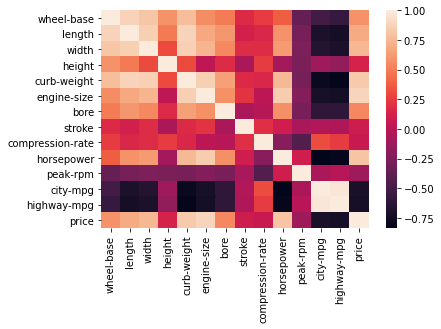

In [9]:
num_data=datacopy.select_dtypes(exclude=object)

# we will look at the correlation of the different features and the price
num_features=list(num_data.columns)
correlations=num_data[num_features].corr()
sns.heatmap(correlations)

In [10]:
# clearly the compression-rate,stroke and peak-rpm has a correlation coefficient near 0. So we will drop these.
# We can also see heavy collinearity between city-mpg and highway-mpg. So we will drop highway-mpg for now.
num_data=num_data.drop(['stroke','compression-rate','peak-rpm','highway-mpg'], axis=1)

## Training and testing

In [11]:
# final data
final_data=pd.concat([num_data,obj_data], axis=1)

# randomizing the final data
final_data = final_data.sample(frac=1,random_state=1).reset_index(drop=True)

# setting up the features
features=list(final_data.columns)
features.remove('price')

# train/test data, 80/20 split
train=final_data.sample(154)
test=final_data.sample(39)
lr=LinearRegression()
lr.fit(train[features], train['price'])
predictions=lr.predict(test[features])
rmse=mean_squared_error(predictions,test['price'])**0.5
print(rmse)

1315.6828413648122


In [12]:
print(final_data['price'].max())
print(final_data['price'].min())

45400.0
5118.0


In [13]:
# comparing with the minimum and maximum values of price, the rmse does't look too bad. We will now proceed
# to perform k-fold cross validation to get and ideal value of k.

## K-fold cross validation

In [14]:
# we will construct a kfold validator function with mean squared error as the scoring criteria
def kfold_validator_rmse(data,target,features,kfold):
    lr=LinearRegression()
    kf=KFold(kfold, shuffle=True, random_state=1)
    mses = cross_val_score(lr,data[features],data[target],scoring='neg_mean_squared_error',cv=kf)
    rmses=np.sqrt(abs(mses))
    mean_rmse= np.mean(rmses)
    sd=np.sqrt(st.variance(rmses))
    list=[mean_rmse,sd]
    return list
# we will also construct a kfold validator function with r2 as the scoring criteria
def kfold_validator_r2(data,target,features,kfold):
    lr=LinearRegression()
    kf=KFold(kfold, shuffle=True, random_state=1)
    mses = cross_val_score(lr,data[features],data[target],scoring='r2',cv=kf)
    rmses=np.sqrt(abs(mses))
    mean_rmse= np.mean(rmses)
    sd=np.sqrt(st.variance(rmses))
    list=[mean_rmse,sd]
    return list


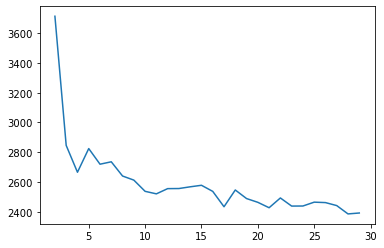

In [15]:
# we will now look at the optimal k value for k-fold cross validation
rmses=[]
sd=[]
for i in range(2,30):
    result=kfold_validator_rmse(final_data,'price',features,i)
    rmses.append(result[0])
    sd.append(result[1])

plt.plot(range(2,30),rmses)
plt.show()
# so the rmse value begins to decrease around the k=4 mark

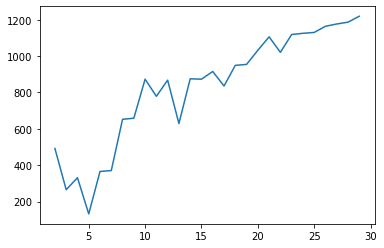

In [16]:
plt.plot(range(2,30),sd)
plt.show()
# the standard deviation begins to increase from k=5.
# therefore we can take the optimal value of k to be 4

In [17]:
# now let us find the r2 score using k=4
print(kfold_validator_r2(final_data,'price',features,4))

# this means that the the features we used and the target feature have a strong correlation. (Please correct me if
# if I am wrong)

[0.9364509343886858, 0.030230775735750566]


In conclusion, we can say that our model is not that great, but can pass as a rough prediction model. We could improve the model getting a larger dataset or doing a bit more advanced analysis into feature engineering.